In [1]:
#sequencia de imports

import yfinance as yf
import matplotlib.pyplot as plt
import finplot as fplt
import seaborn as sns
import numpy as np
import pandas as pd

Ações a serem analisadas no case: "GOLL4.SA PETR4.SA ^BVSP BZ=F BRL=X"
Períodos aceitos pelo yfinance: 1d, 5d, 1mo, 3mo, 6mo, 1y, 2y, 5y, 10y, ytd, max

In [2]:
qnt_acoes = 5
tickers = ['GOLL4.SA', 'PETR4.SA', '^BVSP', 'BZ=F', 'USDBRL=X']
period = ['max', 'max', 'max', 'max', 'max']
dfs = []
for i in range(qnt_acoes):
    try:
        dfs.append(yf.download(tickers=f'{tickers[i]}', period=f'{period[i]}', start='2008-12-01', end='2011-12-31'))
    except ValueError:
        print(f'Erro na coleta de dados. Ticker invalido -> {tickers[i]}')
        quit()

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Plot de gráficos CandleStick -> finplot

In [3]:
# for i in range (qnt_acoes):
#     fplt.candlestick_ochl(dfs[i][['Open', 'Close', 'High', 'Low']])
#     fplt.show()

Plot de gráficos de linhas no período selecionado -> matplotlib

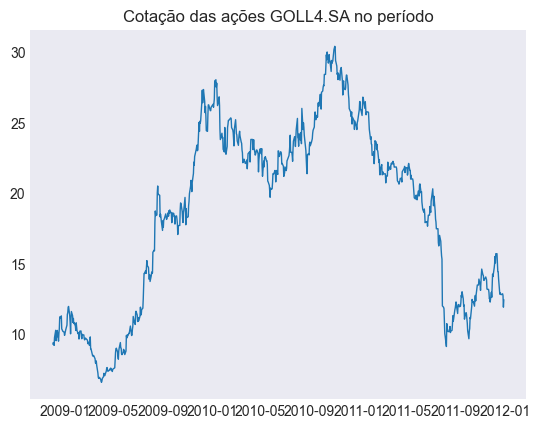

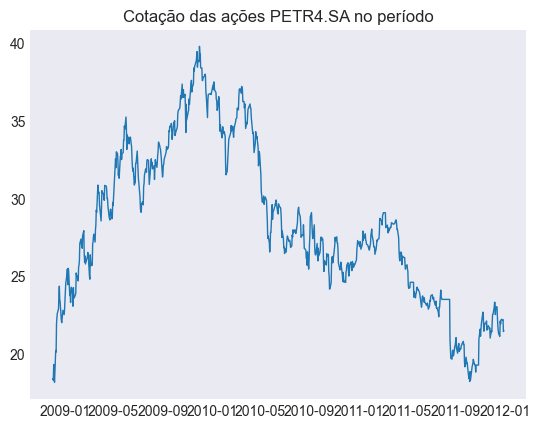

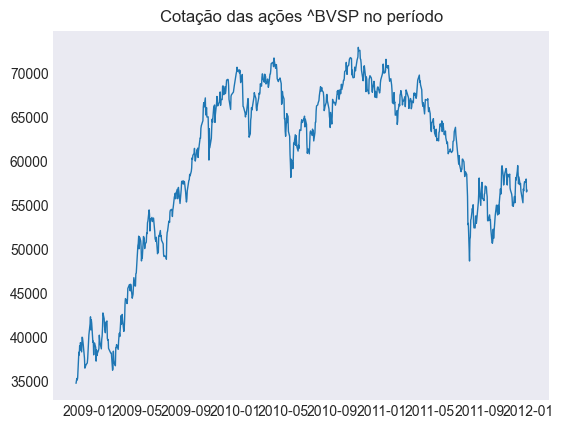

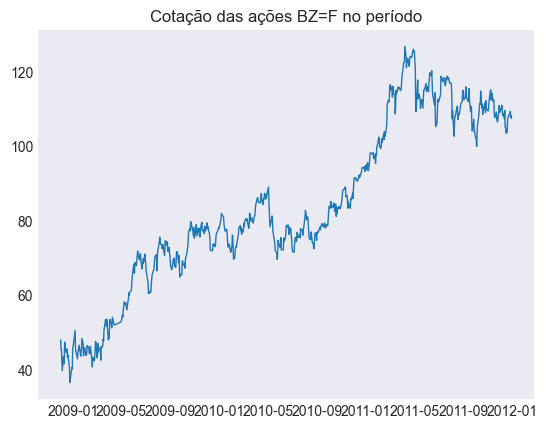

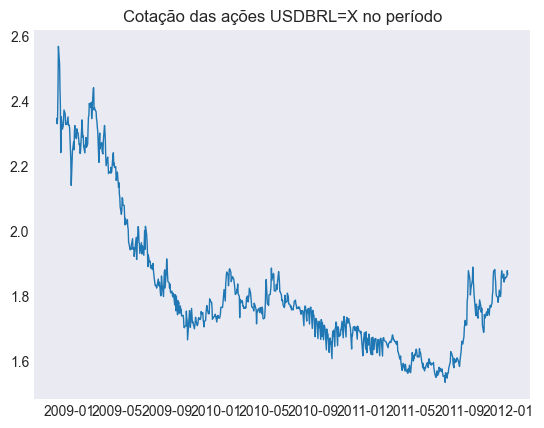

In [4]:
plt.style.use('seaborn-v0_8-dark')
for i in range(qnt_acoes):
    xpoints = dfs[i].index
    ypoints = dfs[i][['Close']].values
    plt.title(f"Cotação das ações {tickers[i]} no período")
    plt.plot(xpoints, ypoints, linewidth = '1')
    # plt.savefig(f'{tickers[i]}.pdf') #download do gráfico
    plt.show()

Gráfico que apresenta simultaneamente as cotações durante as crises de 2008

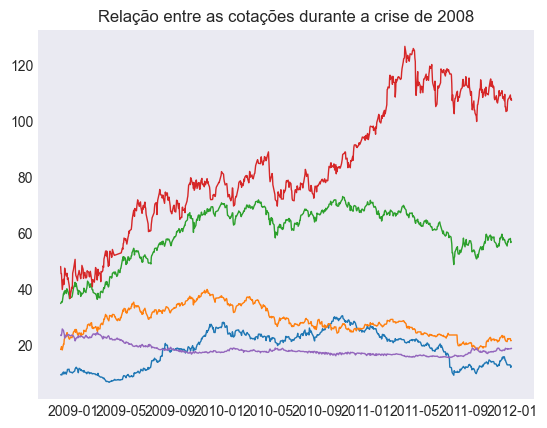

In [5]:
plt.title('Relação entre as cotações durante a crise de 2008')
for i in range(5):
    xpoints = dfs[i].index
    ypoints = dfs[i][['Close']].values
    if i == 2:
        ypoints = ypoints/1000 #Apenas para "enquadrar" na mesma escala
    if i == 4:
        ypoints = ypoints*10 #Apenas para "enquadrar" na mesma escala
    plt.plot(xpoints, ypoints, linewidth = '1')
plt.axis('auto')
#plt.savefig(f'relacao_2008.png') #download do gráfico
plt.show()

Gráfico que apresenta simultaneamente as cotações durante as crises de 2020

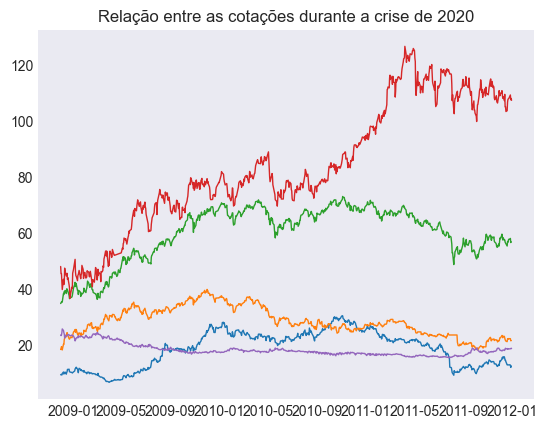

In [6]:
plt.title('Relação entre as cotações durante a crise de 2020')
for i in range(5):
    xpoints = dfs[i].index
    ypoints = dfs[i][['Close']].values
    if i == 2:
        ypoints = ypoints/1000
    if i == 4:
        ypoints = ypoints*10
    plt.plot(xpoints, ypoints, linewidth = '1')
plt.axis('auto')
# plt.savefig(f'relacao_2020.png') #download do gráfico
plt.show()

Relação entre a cotação da IBOVESPA e a cotação das ações PETR4 e GOLL4, do preço do barril de petróleo (brent) e a taxa de câmbio do dólar

Text(0.5, 1.0, 'Correlation Heatmap 2020')

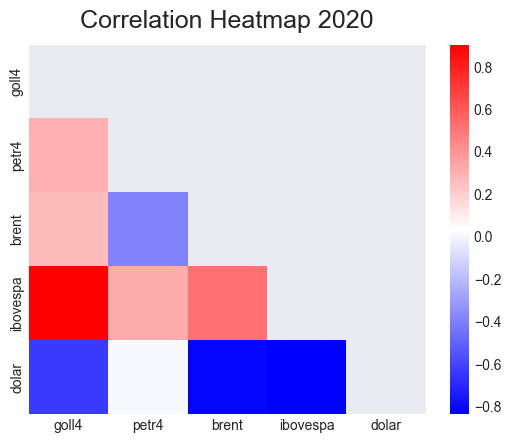

In [7]:
df_goll4 = dfs[0].rename(columns={"Close": "goll4"})
df_petr4 = dfs[1].rename(columns={"Close": "petr4"})
df_brent = dfs[3].rename(columns={"Close": "brent"})
df_ibovespa = dfs[2].rename(columns={"Close": "ibovespa"})
df_dolar = dfs[4].rename(columns={"Close": "dolar"})
dataframe = [df_goll4['goll4'], df_petr4['petr4'], df_brent['brent'], df_ibovespa['ibovespa'], df_dolar['dolar']]
concat = pd.concat(dataframe, axis=1)
mask = np.triu(np.ones_like(concat.corr())) #mask para diminuir o heatmap para um triangulo, cortando as redundâncias
heatmap = sns.heatmap(concat.corr(), cmap='bwr', mask=mask )
heatmap.set_title('Correlation Heatmap 2020', fontdict={'fontsize':18}, pad=12)
# plt.savefig('heatmap.png', dpi=300, bbox_inches='tight') #download do gráfico